In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import os
from skimage.io import imread
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dsb_data_dir = os.path.join( 'data\\stage1_train_labels')
stage_label = 'stage1'

In [3]:
train_labels = pd.read_csv(os.path.join(dsb_data_dir,'{}_train_labels.csv'.format(stage_label)))
train_labels['EncodedPixels'] = train_labels['EncodedPixels'].map(lambda ep: [int(x) for x in ep.split(' ')])
train_labels.sample(3)

,ImageId,EncodedPixels
3448,1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526...,"[597617, 3, 598640, 5, 599664, 5, 600687, 6, 6..."
19577,a65bbfc5673e8053b6ce49f39c79cf3a846fe5cc46dd93...,"[8601, 15, 9118, 21, 9635, 25, 10153, 27, 1067..."
17205,947c0d94c8213ac7aaa41c4efc95d854246550298259cf...,"[147, 16, 402, 19, 658, 19, 913, 20, 1169, 21,..."


In [4]:
# Load in all Images
dsb_data_dir2 = os.path.join( 'data')
dsb_data_dir2 = os.path.join(dsb_data_dir2, 'stage1_*', '*', '*', '*')

all_images = glob(dsb_data_dir2)
# print(len(all_images))
# print(all_images[1])
img_df = pd.DataFrame({'path': all_images})

img_id = lambda in_path: in_path.split('\\')[-3]
img_type = lambda in_path: in_path.split('\\')[-2]
img_group = lambda in_path: in_path.split('\\')[-4].split('_')[1]
img_stage = lambda in_path: in_path.split('\\')[-4].split('_')[0]

# print(len(img_df['path']))
# print(type(img_id))

img_df['ImageId'] = img_df['path'].map(img_id)
img_df['ImageType'] = img_df['path'].map(img_type)
img_df['TrainingSplit'] = img_df['path'].map(img_group)
img_df['Stage'] = img_df['path'].map(img_stage)
print(len(img_df['ImageId']))
img_df.sample(5)

30196


,path,ImageId,ImageType,TrainingSplit,Stage
19364,data\stage1_train\a102535b0e88374bea4a1cfd9ee7...,a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a98...,masks,train,stage1
19473,data\stage1_train\a102535b0e88374bea4a1cfd9ee7...,a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a98...,masks,train,stage1
8094,data\stage1_train\4217e25defac94ff465157d53f5a...,4217e25defac94ff465157d53f5a24b8a14045b763d860...,masks,train,stage1
2522,data\stage1_train\12f89395ad5d21491ab9cec137e2...,12f89395ad5d21491ab9cec137e247652451d283064773...,masks,train,stage1
25418,data\stage1_train\d32ea6d318626ca14a967d0c1ad3...,d32ea6d318626ca14a967d0c1ad3218aebfe636624a8d1...,masks,train,stage1


In [5]:
# Create Training Data
# Here we make training data and load all the images into the dataframe. 
# We take a simplification here of grouping all the regions together (rather than keeping them distinct).
%time
train_df = img_df.query('TrainingSplit=="train"')
train_rows = []
group_cols = ['Stage', 'ImageId']
for n_group, n_rows in train_df.groupby(group_cols):
    c_row = {col_name: col_value for col_name, col_value in zip(group_cols, n_group)}
    c_row['masks'] = n_rows.query('ImageType == "masks"')['path'].values.tolist()
    c_row['images'] = n_rows.query('ImageType == "images"')['path'].values.tolist()
    train_rows += [c_row]
train_img_df = pd.DataFrame(train_rows)    
IMG_CHANNELS = 1

Wall time: 0 ns


In [6]:
print(train_rows[0])
train_img_df.sample(1)

{'ImageId': '00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552', 'masks': ['data\\stage1_train\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png', 'data\\stage1_train\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\0e548d0af63ab451616f082eb56bde13eb71f73dfda92a03fbe88ad42ebb4881.png', 'data\\stage1_train\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\0ea1f9e30124e4aef1407af239ff42fd6f5753c09b4c5cac5d08023c328d7f05.png', 'data\\stage1_train\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\0f5a3252d05ecdf453bdd5e6ad5322c454d8ec2d13ef0f0bf45a6f6db45b5639.png', 'data\\stage1_train\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552\\masks\\2c47735510ef91a11fde42b317829cee5fc04d05a797b90008803d7151951d58.png', 'data\\stage1_train\\00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552

,ImageId,Stage,images,masks
437,a65bbfc5673e8053b6ce49f39c79cf3a846fe5cc46dd93...,stage1,[data\stage1_train\a65bbfc5673e8053b6ce49f39c7...,[data\stage1_train\a65bbfc5673e8053b6ce49f39c7...


In [7]:
from skimage import color
def read_and_stack4img(in_img_list):
    img = np.sum(np.stack([imread(c_img) for c_img in in_img_list], 0), 0)
    print('______________________________________')
    img = img[:,:,0:3]
    img_gray = np.zeros([img.shape[0], img.shape[1]])
    for i in range(len(img_gray)):
        for j in range(len(img_gray[i])):
            img_gray[i][j] = img[i][j][0]*0.2125 + img[i][j][1]*0.7154 + img[i][j][2]*0.0721
            img_gray[i][j] = img_gray[i][j]/255.0
    print(np.mean(img_gray))
    if np.mean(img_gray) > 0.5:
        print('_____________on')
        img_gray = 1 - img_gray 
    img_gray = img_gray.reshape([img_gray.shape[0], img_gray.shape[1], 1])
    return img_gray
def read_and_stack4mask(in_img_list):
    return np.sum(np.stack([imread(c_img) for c_img in in_img_list], 0), 0)/255.0
# train_img_df['images'] = train_img_df['images'].map(read_and_stack4img).map(lambda x: x[:,:,:IMG_CHANNELS])
train_img_df['images'] = train_img_df['images'].map(read_and_stack4img)
train_img_df['masks'] = train_img_df['masks'].map(read_and_stack4mask).map(lambda x: x.astype(int))
train_img_df.sample(1)

______________________________________
0.0240871653837
______________________________________
0.0353670606426
______________________________________
0.635001849394
_____________on
______________________________________
0.681468942493
_____________on
______________________________________
0.635430927883
_____________on
______________________________________
0.0597744810815
______________________________________
0.0653639251111
______________________________________
0.0422174110385
______________________________________
0.0661607929305
______________________________________
0.0464657467925
______________________________________
0.0430083212297
______________________________________
0.160798875081
______________________________________
0.0683318493413
______________________________________
0.0690853941674
______________________________________
0.0350303195352
______________________________________
0.0750214819815
______________________________________
0.0250406302658
_____________________

0.0521664548535
______________________________________
0.0956736728732
______________________________________
0.025211947572
______________________________________
0.0875974649365
______________________________________
0.702574099499
_____________on
______________________________________
0.0825565113741
______________________________________
0.0860147513595
______________________________________
0.0644388834635
______________________________________
0.84518367169
_____________on
______________________________________
0.0407958385991
______________________________________
0.0199217553232
______________________________________
0.0531823850146
______________________________________
0.0780441583372
______________________________________
0.0614579144646
______________________________________
0.596449466835
_____________on
______________________________________
0.0317565056887
______________________________________
0.067269598269
______________________________________
0.0610467648974
_______

0.123578060375
______________________________________
0.0454904593673
______________________________________
0.058602845435
______________________________________
0.470643781978
______________________________________
0.0884347953048
______________________________________
0.610444068517
_____________on
______________________________________
0.11602751556
______________________________________
0.0176281617864
______________________________________
0.0354181077825
______________________________________
0.0321741406439
______________________________________
0.046477912454
______________________________________
0.0404515855725
______________________________________
0.531170973642
_____________on
______________________________________
0.0177099489698
______________________________________
0.532706791829
_____________on
______________________________________
0.0381050259459
______________________________________
0.0865243104315
______________________________________
0.0617861878638
__________

0.023409316119
______________________________________
0.067017140108
______________________________________
0.0197753593038
______________________________________
0.701265716835
_____________on
______________________________________
0.017200903799
______________________________________
0.0384677064185
______________________________________
0.506216247544
_____________on
______________________________________
0.0200273700789
______________________________________
0.0492930932138
______________________________________
0.0609656240426
______________________________________
0.0551604622839
______________________________________
0.0348245279593
______________________________________
0.0426917117422
______________________________________
0.503789423795
_____________on
______________________________________
0.512249602534
_____________on
______________________________________
0.0554494222005
______________________________________
0.0607199294395
______________________________________
0.544312

0.112428854389
______________________________________
0.069559134689
______________________________________
0.0517051547181
______________________________________
0.0169904521867
______________________________________
0.0438461602903
______________________________________
0.0276585597618
______________________________________
0.0304879581227
______________________________________
0.049452718099
______________________________________
0.0317333575405
______________________________________
0.0327091568281
______________________________________
0.114134306066
______________________________________
0.0460526809489
______________________________________
0.0899768904144
______________________________________
0.150965874268
______________________________________
0.0436185829312
______________________________________
0.0611493278952
______________________________________
0.0574236103133
______________________________________
0.060697667739
______________________________________
0.0973100869437


,ImageId,Stage,images,masks
546,cf26c41245febfe67c2a1682cc4ee8752ee40ae3e49610...,stage1,"[[[0.0588235294118], [0.0901960784314], [0.113...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 320, 1)
(256, 256, 1)
(512, 640, 1)
(256, 256, 1)
(256, 256, 1)


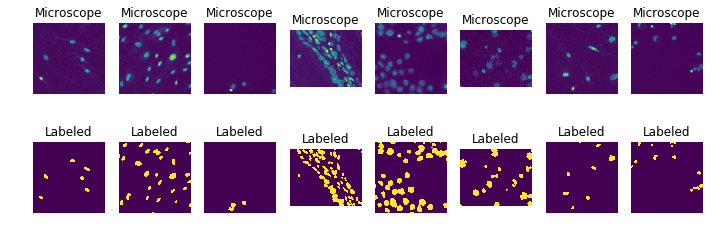

In [8]:
n_img = 8
fig, m_axs = plt.subplots(2, n_img, figsize = (12, 4))
for (_, c_row), (c_im, c_lab) in zip(train_img_df.sample(n_img).iterrows(), 
                                     m_axs.T):
    print(c_row['images'].shape)
    c_im.imshow(c_row['images'].reshape(c_row['images'].shape[0],c_row['images'].shape[1]))
    c_im.axis('off')
    c_im.set_title('Microscope')
    
    c_lab.imshow(c_row['masks'])
    c_lab.axis('off')
    c_lab.set_title('Labeled')

In [9]:
train_img_df.sample(1)['images']
train_img_df.sample(1)['masks']

145    [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,...
Name: masks, dtype: object

In [10]:
train_img_df['images'].map(lambda x: x.shape).value_counts()

(256, 256, 1)      334
(256, 320, 1)      112
(520, 696, 1)       92
(360, 360, 1)       91
(1024, 1024, 1)     16
(512, 640, 1)       13
(603, 1272, 1)       6
(260, 347, 1)        5
(1040, 1388, 1)      1
Name: images, dtype: int64

In [11]:
from keras.layers import merge
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.layers.core import Dense, Activation, Flatten, Reshape, Lambda
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.layers import Input
from keras.optimizers import SGD, adam
import scipy.io as sio
from keras import layers
# from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import optimizers
# from sklearn.metrics import confusion_matrix
import itertools

Using TensorFlow backend.


In [12]:
def get_model():
    inp = Input([None, None, 1])
#     out = Reshape([None, None, 1])(inp)
    out = BatchNormalization(name = 'NormalizeInput')(inp)
    out  = Conv2D(8, kernel_size = (3,3), padding = 'same', activation = 'sigmoid')(out)
    out  = Conv2D(16, kernel_size = (3,3), padding = 'same', activation = 'sigmoid')(out)
    out = BatchNormalization()(out)
    # use dilations to get a slightly larger field of view
    out = Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same', activation = 'sigmoid')(out)
    out = Conv2D(32, kernel_size = (3,3), dilation_rate = 5, padding = 'same', activation = 'sigmoid')(out)
    out = Conv2D(32, kernel_size = (3,3), dilation_rate = 11, padding = 'same', activation = 'sigmoid')(out)
    out = BatchNormalization()(out)
    out = Conv2D(16, kernel_size = (3,3), dilation_rate = 2, padding = 'same', activation = 'sigmoid')(out)
    out = Conv2D(32, kernel_size = (3,3), dilation_rate = 5, padding = 'same', activation = 'sigmoid')(out)
    out = Conv2D(32, kernel_size = (3,3), dilation_rate = 11, padding = 'same', activation = 'sigmoid')(out)
    out = BatchNormalization()(out)
    # the final processing
    out = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'sigmoid')(out)
    out = Conv2D(1, kernel_size = (1,1), padding = 'same', activation = 'sigmoid')(out)
    return Model(inp, out)
simple_cnn = get_model()
simple_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 1)     0         
_________________________________________________________________
NormalizeInput (BatchNormali (None, None, None, 1)     4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 8)     80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 16)    1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, None, None, 16)    64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 32)    4640      
__________

In [13]:
from keras import backend as K
smooth = 1.
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)
simple_cnn.compile(optimizer = 'adam', 
                   loss = dice_coef_loss, 
                   metrics = [dice_coef, 'acc', 'mse'])

In [14]:
train_img_df.shape

(670, 4)

In [15]:
def simple_gen():
    while True:
        for _, c_row in train_img_df.iterrows():
            yield np.expand_dims(c_row['images'],0), np.expand_dims(np.expand_dims(c_row['masks'],-1),0)

simple_cnn.fit_generator(simple_gen(), 
                         steps_per_epoch=train_img_df.shape[0],
                        epochs = 5)

Epoch 1/5
670/670 [==============================] - 79s - loss: -0.6681 - dice_coef: 0.6681 - acc: 0.9304 - mean_squared_error: 0.0557    
Epoch 2/5
670/670 [==============================] - 69s - loss: -0.8283 - dice_coef: 0.8283 - acc: 0.9532 - mean_squared_error: 0.0438    
Epoch 3/5
670/670 [==============================] - 70s - loss: -0.8479 - dice_coef: 0.8479 - acc: 0.9551 - mean_squared_error: 0.0430    
Epoch 4/5
670/670 [==============================] - 70s - loss: -0.8571 - dice_coef: 0.8571 - acc: 0.9564 - mean_squared_error: 0.0423    
Epoch 5/5
670/670 [==============================] - 70s - loss: -0.8607 - dice_coef: 0.8607 - acc: 0.9569 - mean_squared_error: 0.0422    


In [16]:
test_df = img_df.query('TrainingSplit=="test"')
test_rows = []
group_cols = ['Stage', 'ImageId']
for n_group, n_rows in test_df.groupby(group_cols):
    c_row = {col_name: col_value for col_name, col_value in zip(group_cols, n_group)}
    c_row['images'] = n_rows.query('ImageType == "images"')['path'].values.tolist()
    test_rows += [c_row]
test_img_df = pd.DataFrame(test_rows)    

test_img_df['images'] = test_img_df['images'].map(read_and_stack4img).map(lambda x: x[:,:,:IMG_CHANNELS])
print(test_img_df.shape[0], 'images to process')
test_img_df.sample(1)

______________________________________
0.0174632951325
______________________________________
0.127691503387
______________________________________
0.0897163540709
______________________________________
0.0531388825061
______________________________________
0.0671182071461
______________________________________
0.552779522353
_____________on
______________________________________
0.0402404904833
______________________________________
0.684126580838
_____________on
______________________________________
0.0304077507468
______________________________________
0.0175172693589
______________________________________
0.116125269299
______________________________________
0.0143434532016
______________________________________
0.867277187454
_____________on
______________________________________
0.0821692971622
______________________________________
0.575762998649
_____________on
______________________________________
0.0597045300054
______________________________________
0.0595192703546
_______

,ImageId,Stage,images
34,648c8ffa496e1716017906d0bf135debfc93386ae86aa3...,stage1,"[[[0.0509803921569], [0.0509803921569], [0.050..."


In [17]:
test_img_df['masks'] = test_img_df['images'].map(lambda x: simple_cnn.predict(np.expand_dims(x, 0))[0, :, :, 0])

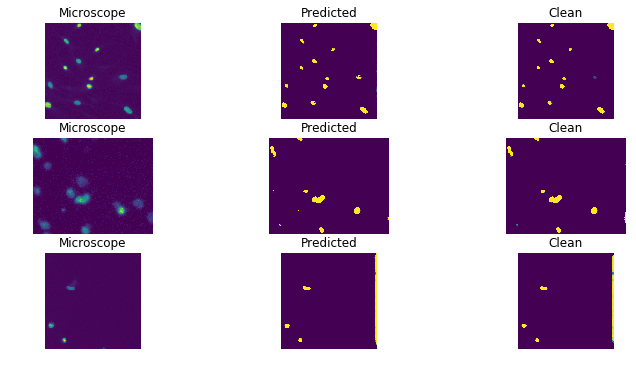

In [18]:
n_img = 3
from skimage.morphology import closing, opening, disk
def clean_img(x):
    return opening(closing(x, disk(1)), disk(3))
fig, m_axs = plt.subplots(3, n_img, figsize = (12, 6))
for (_, d_row), (c_im, c_lab, c_clean) in zip(test_img_df.sample(n_img).iterrows(), m_axs):
    
    c_im.imshow(d_row['images'].reshape(d_row['images'].shape[0],d_row['images'].shape[1]))
    c_im.axis('off')
    c_im.set_title('Microscope')
    
    c_lab.imshow(d_row['masks'])
    c_lab.axis('off')
    c_lab.set_title('Predicted')
    
    c_clean.imshow(clean_img(d_row['masks']))
    c_clean.axis('off')
    c_clean.set_title('Clean')

In [19]:
from skimage.morphology import label # label regions
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def prob_to_rles(x, cut_off = 0.5):
    lab_img = label(x>cut_off)
    if lab_img.max()<1:
        lab_img[0,0] = 1 # ensure at least one prediction per image
    for i in range(1, lab_img.max()+1):
        yield rle_encoding(lab_img==i)

In [20]:
_, train_rle_row = next(train_img_df.tail(45).iterrows()) 
train_row_rles = list(prob_to_rles(train_rle_row['masks']))

In [21]:
tl_rles = train_labels.query('ImageId=="{ImageId}"'.format(**train_rle_row))['EncodedPixels']

In [22]:
match, mismatch = 0, 0
for img_rle, train_rle in zip(sorted(train_row_rles, key = lambda x: x[0]), 
                             sorted(tl_rles, key = lambda x: x[0])):
    for i_x, i_y in zip(img_rle, train_rle):
        if i_x == i_y:
            match += 1
        else:
            mismatch += 1
print('Matches: %d, Mismatches: %d, Accuracy: %2.1f%%' % (match, mismatch, 100.0*match/(match+mismatch)))

Matches: 205, Mismatches: 1961, Accuracy: 9.5%


In [23]:
test_img_df['rles'] = test_img_df['masks'].map(clean_img).map(lambda x: list(prob_to_rles(x)))

In [24]:
out_pred_list = []
for _, c_row in test_img_df.iterrows():
    for c_rle in c_row['rles']:
        out_pred_list+=[dict(ImageId=c_row['ImageId'], 
                             EncodedPixels = ' '.join(np.array(c_rle).astype(str)))]
out_pred_df = pd.DataFrame(out_pred_list)
print(out_pred_df.shape[0], 'regions found for', test_img_df.shape[0], 'images')
out_pred_df.sample(3)

2444 regions found for 65 images


,EncodedPixels,ImageId
687,14584 5 14841 10 15099 12 15358 14 15617 15 15...,43a71aeb641faa18742cb826772a8566c6c947d7050f9a...
712,38059 4 38317 8 38576 10 38835 12 39095 13 393...,43a71aeb641faa18742cb826772a8566c6c947d7050f9a...
363,1308 3 1825 7 2344 7 2862 9 3382 8 3901 9 4420...,336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a96...


In [25]:
out_pred_df[['ImageId', 'EncodedPixels']].to_csv('predictions.csv', index = False)